# Exam 14th of June 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [2p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? [3p]
5. Advanced question: What is the expected number of steps until the first time one enters the suburbs region having started in the downtown region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [1]:
# Part 1

import numpy as np

# Transition Matrix P
# Rows: Current (D, S, C), Columns: Next (D, S, C)
P = np.array([
    [0.3, 0.4, 0.3], # Downtown
    [0.2, 0.5, 0.3], # Suburbs
    [0.4, 0.3, 0.3]  # Countryside
])

# 1. Probability S -> D in 2 steps
# This is (P^2)[1, 0] (row index 1 is Suburbs, col index 0 is Downtown)
P2 = np.linalg.matrix_power(P, 2)
prob_2_steps = P2[1, 0]

# 2. Probability S -> D for the FIRST TIME at step 2
# Paths: S -> S -> D OR S -> C -> D
# (We exclude S -> D -> D because that hits at step 1)
first_hit_2_steps = (P[1, 1] * P[1, 0]) + (P[1, 2] * P[2, 0])

print(f"Prob in Downtown after 2 steps: {prob_2_steps:.4f}")
print(f"Prob in Downtown for the FIRST TIME at step 2: {first_hit_2_steps:.4f}")



# Fill in the answer to part 1 below
problem1_p1 = prob_2_steps

Prob in Downtown after 2 steps: 0.2800
Prob in Downtown for the FIRST TIME at step 2: 0.2200


In [ ]:
# Part 2

# Fill in the answer to part 2 below
problem1_p2 = first_hit_2_steps

In [ ]:
# Part 3

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True


## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.


In [3]:
# Part 4

# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!

# Solve (P^T - I)pi = 0
# We replace one equation with the constraint that sum(pi) = 1
dim = P.shape[0]
A = (P.T - np.eye(dim))
A[-1] = np.ones(dim)
b = np.zeros(dim)
b[-1] = 1

stationary_dist = np.linalg.solve(A, b)
regions = ["Downtown", "Suburbs", "Countryside"]
for i, prob in enumerate(stationary_dist):
    print(f"Stationary Prob ({regions[i]}): {prob:.4f}")

print(stationary_dist)


problem1_stationary = stationary_dist

Stationary Prob (Downtown): 0.2889
Stationary Prob (Suburbs): 0.4111
Stationary Prob (Countryside): 0.3000
[0.28888889 0.41111111 0.3       ]


In [6]:
# Part 5

# Fill in the answer to part 5 below
# That is, the expected number of steps

# System of equations for hitting time to Suburbs (index 1)
# e0 = 1 + 0.3*e0 + 0.3*e2  =>  0.7*e0 - 0.3*e2 = 1
# e2 = 1 + 0.4*e0 + 0.3*e2  => -0.4*e0 + 0.7*e2 = 1

A_hit = np.array([
    [0.7, -0.3],
    [-0.4, 0.7]
])
b_hit = np.array([1, 1])

e0, e2 = np.linalg.solve(A_hit, b_hit)

print(f"Expected steps from Downtown to Suburbs: {e0:.4f}")


problem1_ET = [e0, e2]




def calculate_hitting_time(P, target_state):
    """
    Calculates the expected hitting time to a target state from all other states.
    
    Parameters:
    P (np.array): Transition matrix (n x n) where rows sum to 1.
    target_state (int): The index of the state we want to reach.
    """
    n = P.shape[0]
    
    # Identify the 'transient' states (all states except the target)
    transient_indices = [i for i in range(n) if i != target_state]
    
    # 1. Extract the sub-matrix Q
    # Q contains the transition probabilities between non-target states.
    # We use np.ix_ to select specific rows and columns.
    Q = P[np.ix_(transient_indices, transient_indices)]
    
    # 2. Set up the system (I - Q)h = 1
    # Identity matrix of the size of our transient state space
    I = np.eye(len(transient_indices))
    
    # The matrix (I - Q)
    A = I - Q
    
    # The right-hand side is a vector of ones (representing the 1 step taken)
    b = np.ones(len(transient_indices))
    
    # 3. Solve the linear system
    try:
        # h_vals will contain the hitting times for each transient state
        h_vals = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        return "The target state is not reachable from all states (Matrix is singular)."

    # 4. Map the results back to the original state names for clarity
    results = {}
    for i, state_idx in enumerate(transient_indices):
        results[state_idx] = h_vals[i]
        
    return results

# --- Example usage with the Delivery Truck Problem ---
# States: 0: Downtown, 1: Suburbs, 2: Countryside
P_truck = np.array([
    [0.3, 0.4, 0.3],
    [0.2, 0.5, 0.3],
    [0.4, 0.3, 0.3]
])

target = 1  # We want to hit the Suburbs
hitting_times = calculate_hitting_time(P_truck, target)

print(f"--- Expected Steps to reach State {target} ---")
for state, time in hitting_times.items():
    state_name = ["Downtown", "Suburbs", "Countryside"][state]
    print(f"From {state_name}: {time:.4f} steps")

Expected steps from Downtown to Suburbs: 2.7027
--- Expected Steps to reach State 1 ---
From Downtown: 2.7027 steps
From Countryside: 2.9730 steps



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]


In [9]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 1. Load the data
problem2_df = pd.read_csv('data/abalone.csv')

# Identify Features and Target
# Note: 'Sex' is categorical, usually we would one-hot encode it
# but for a basic linear regression we will drop it or focus on numeric features.
target = 'Rings'
features = [col for col in problem2_df.columns if col != target]

# Displaying counts for the solution
number_of_features = len(features)
number_of_observations = len(problem2_df)

print(number_of_features)
print(number_of_observations)


7
4177


In [8]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem2_features = features
print(problem2_features)

# Fill in the target as a string with the correct column name

problem2_target = "Rings"

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


Mean Absolute Error: 1.6292


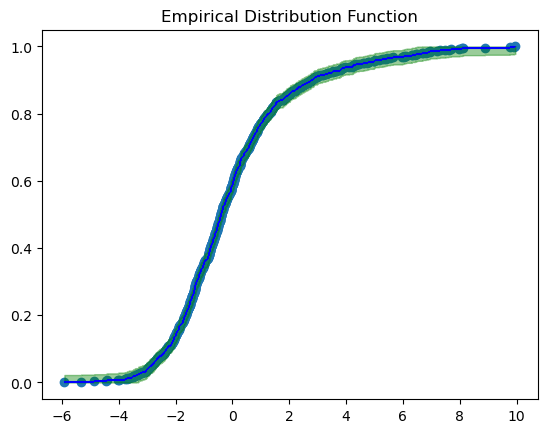

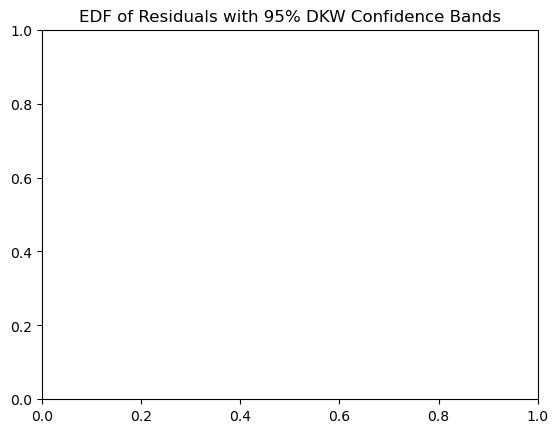

In [12]:
# Part 2
# 2. Split the data
X = problem2_df[features]
# Convert 'Sex' to dummy variables if present
X = pd.get_dummies(X, drop_first=True) 
y = problem2_df[target]


problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3. Train the model
model = LinearRegression()
model.fit(problem2_X_train, problem2_y_train)

# 4. Evaluate
y_pred = model.predict(problem2_X_test)
mae = mean_absolute_error(problem2_y_test, y_pred)
residuals = problem2_y_test - y_pred

print(f"Mean Absolute Error: {mae:.4f}")

# Plotting EDF of Residuals with DKW Confidence Bands
# Assuming Utils.py logic for makeEDF and plotEDF
from Utils import makeEDF, plotEDF
edf_residuals = makeEDF(residuals)
plotEDF(edf_residuals, confidence_band=True, alpha=0.05)
plt.title("EDF of Residuals with 95% DKW Confidence Bands")
plt.show()

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42

In [ ]:
# Part 3

# Include the necessary imports

# Initialize your linear regression model
problem2_model = XXX

# Train your model on the training data





In [ ]:
# Part 4

# Evaluate the model by computing the mean absolute error 
problem2_mae = XXX

Mean Absolute Error: 1.6292


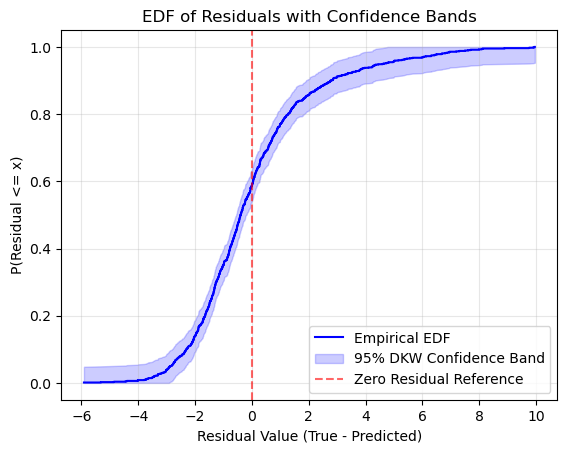

In [15]:
# Part 4

# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell

# from Utils import makeEDF,plotEDF


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# --- 1. Setup Data ---
# Assuming problem2_df is loaded and split
X = problem2_df.drop('Rings', axis=1)
y = problem2_df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Train and Predict ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# --- 3. Compute EDF and DKW Bands ---
def plot_residual_edf(residuals, alpha=0.05):
    n = len(residuals)
    sorted_res = np.sort(residuals)
    edf = np.arange(1, n + 1) / n
    
    # DKW epsilon calculation
    epsilon = np.sqrt(np.log(2 / alpha) / (2 * n))
    
    lower_band = np.clip(edf - epsilon, 0, 1)
    upper_band = np.clip(edf + epsilon, 0, 1)
    
    # Plotting
    plt.step(sorted_res, edf, label='Empirical EDF', where='post', color='blue', lw=1.5)
    plt.fill_between(sorted_res, lower_band, upper_band, color='blue', alpha=0.2, 
                     label=f'{int((1-alpha)*100)}% DKW Confidence Band')
    
    # Add a reference line at x=0 (perfect prediction center)
    plt.axvline(0, color='red', linestyle='--', alpha=0.6, label='Zero Residual Reference')
    
    plt.title('EDF of Residuals with Confidence Bands')
    plt.xlabel('Residual Value (True - Predicted)')
    plt.ylabel('P(Residual <= x)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('residual_edf.png')

plot_residual_edf(residuals)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")


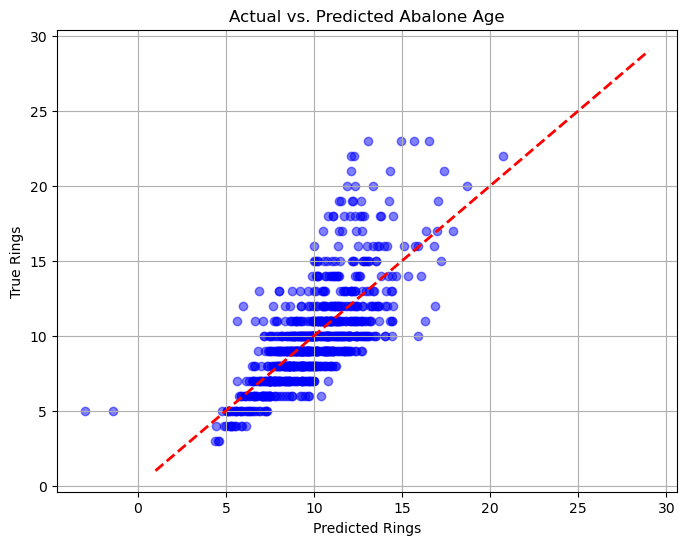

In [14]:
# Part 5

# Write the code below to produce the scatter plot for part 5

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, problem2_y_test, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Identity line
plt.xlabel("Predicted Rings")
plt.ylabel("True Rings")
plt.title("Actual vs. Predicted Abalone Age")
plt.grid(True)
plt.show()



## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.

#### Discussion on the value of the MAE

#### Discussion on the predicted vs. true scatterplot

#### Discussion

6. Reasoning about PerformanceMean Absolute Error (MAE): The MAE tells us, on average, how many "rings" off our prediction is. If the average number of rings is 10 and our MAE is 1.5, we have a ~15% error rate. In the Abalone dataset, an MAE around 1.5–2.0 is typical for simple linear models.Scatter Plot Analysis: * Linearity: If the points cluster tightly around the $45^{\circ}$ red dashed line, the model is performing well.Heteroscedasticity: You will likely notice that for young abalones (low ring count), the model is accurate, but for older abalones (high ring count), the points spread out. This suggests the relationship becomes less linear or more noisy as the abalone ages.Underestimation: Often, linear models "cap out" and struggle to predict the very high ring counts (older shells), leading to a "cloud" of points that sits above the identity line at the far right.


---
## Exam vB, PROBLEM 3
Maximum Points = 13


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]


In [18]:
# Part 1

import pandas as pd
import numpy as np

# 1. Load the data with the correct separator
# sep='\s+' tells pandas to look for one or more spaces as the separator
problem3_df = pd.read_csv('data/visits_clean.csv', sep='\s+')

# 2. Define target and features
target_col = 'ofp'
utilization_cols = ['ofnp', 'opp', 'opnp', 'emr', 'hosp']

# Now 'ofp' will be a real column!
feature_cols = [col for col in problem3_df.columns if col not in ([target_col] + utilization_cols)]

# 3. Create arrays
problem3_X = problem3_df[feature_cols].values
problem3_y = problem3_df[target_col].values

print(f"Success! Features shape: {problem3_X.shape}")
print(f"Target shape: {problem3_y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    problem3_X, problem3_y, test_size=0.2, random_state=42
)

# 3. Poisson Regression Class
class PoissonRegression:
    def __init__(self):
        self.coeffs = None

    def loss(self, coeffs, X, y):
        # coeffs[0] is intercept beta, coeffs[1:] is alpha vector
        beta = coeffs[0]
        alpha = coeffs[1:]
        
        # lambda = exp(X*alpha + beta)
        linear_part = X @ alpha + beta
        lambd = np.exp(linear_part)
        
        # Loss = sum(exp(linear) - y * linear)
        # We divide by len(y) to get the average loss (mean log-likelihood)
        return np.mean(lambd - y * linear_part)

    def fit(self, X, y):
        # Initialize weights to zeros (1 intercept + n features)
        initial_guess = np.zeros(X.shape[1] + 1)
        res = minimize(self.loss, initial_guess, args=(X, y))
        self.coeffs = res.x

    def predict(self, X):
        beta = self.coeffs[0]
        alpha = self.coeffs[1:]
        return np.exp(X @ alpha + beta)

# 4. Train the model
model = PoissonRegression()
model.fit(X_train, y_train)


# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
print(problem3_df)

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\tureh\AppData\Local\Temp\ipykernel_10288\154484180.py:8: SyntaxWarning: invalid escape sequence '\s'
  problem3_df = pd.read_csv('data/visits_clean.csv', sep='\s+')


Success! Features shape: (4406, 15)
Target shape: (4406,)
      ofp  ofnp  opp  opnp  emr  hosp  exclhlth  poorhlth  numchron  adldiff  \
0       5     0    0     0    0     1         0         0         2        0   
1       1     0    2     0    2     0         0         0         2        0   
2      13     0    0     0    3     3         0         1         4        1   
3      16     0    5     0    1     1         0         1         2        1   
4       3     0    0     0    0     0         0         0         2        1   
...   ...   ...  ...   ...  ...   ...       ...       ...       ...      ...   
4401   11     0    0     0    0     0         0         0         0        0   
4402   12     0    0     0    0     0         0         0         2        0   
4403   10     0   20     0    1     1         0         0         5        0   
4404   16     1    0     0    0     0         0         0         0        0   
4405    0     0    0     0    0     0         1         0     

In [ ]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem3_features = ["XXX"]

# Fill in the target as a string with the correct column name

problem3_target = "XXX"


## Part 1

Double click this cell to enter edit mode and write your answer for part 1 below this line.

#### What features are reasonable?

#### In regards to how much data we have, how many features do you think we should aim for?

#### What other features would you like to have used but was not collected?

#### Discussion


In [ ]:
# Part 2

# Fill in your X and y below
problem3_X = XXX
problem3_y = XXX

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = XXX

In [19]:
# Part 3

# Fill in the function loss below

import numpy as np
from scipy import optimize

class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None

    def fit(self, X, Y):
        # define the objective/cost/loss function we want to minimise
        def loss(coeffs):
            # 1. Separate alpha (slopes) and beta (intercept)
            alpha = coeffs[:-1]
            beta = coeffs[-1]
            
            # 2. Compute the linear predictor (log-link)
            # This is alpha * X + beta
            linear_predictor = np.dot(X, alpha) + beta
            
            # 3. Compute lambda (the mean of the Poisson distribution)
            # lam = exp(linear_predictor)
            lam = np.exp(linear_predictor)

            # 4. Return the Negative Log-Likelihood
            # From our derivation: Loss = sum( lam - Y * log(lam) )
            # Since log(lam) is just our linear_predictor, we use that for efficiency.
            # We ignore the log(Y!) term as it doesn't affect the optimization.
            return np.sum(lam - Y * linear_predictor)

        # Use the loss above together with an optimization method from scipy
        initial_arguments = np.zeros(shape=X.shape[1] + 1) # initial guess as 0
        
        # 'cg' stands for Conjugate Gradient, which works well for these types of functions
        self.result = optimize.minimize(loss, initial_arguments, method='cg')
        self.coeffs = self.result.x

    def predict(self, X):
        # Use the trained model to predict Y (which is the expected value lambda)
        if (self.coeffs is not None):
            alpha = self.coeffs[:-1]
            beta = self.coeffs[-1]
            return np.exp(np.dot(X, alpha) + beta)
        else:
            raise ValueError("Model has not been trained yet. Please call .fit() first.")

In [20]:
# Part 4

# Initialize your PoissonRegression model
# 1. Initialize your PoissonRegression model
problem3_model = PoissonRegression()

# 2. Fit your initialized model on the training data
# Ensure problem3_X_train and problem3_y_train are the 80% split arrays
problem3_model.fit(X_train, y_train)

# 3. Check that everything went well
# This prints the full OptimizeResult object from scipy
print(problem3_model.result)

 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: -16294.685473880656
       x: [-3.895e-01  2.815e-01 ...  2.823e-01  1.336e+00]
     nit: 528
     jac: [-8.545e-04  1.221e-04 ... -3.662e-04  1.147e-02]
    nfev: 19815
    njev: 1165


In [ ]:
# Part 5

# Put the computed metric value in the variable below
problem3_metric = XXX


## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.

#### Discussion on reasonable metrics and discussion about the value of the metric

#### Comparison with a naive model


Discussion on reasonable metrics and discussion about the value of the metric
For count data like "number of physician office visits," a reasonable metric is the Mean Absolute Error (MAE).

Justification: Unlike Mean Squared Error (MSE), which penalizes outliers heavily (common in healthcare data where a few patients might have 50+ visits), MAE is more robust and highly interpretable. It tells us, on average, how many visits our prediction is off by. In a clinical or administrative context, saying "the model's prediction is off by 2.1 visits per patient" is a clear, actionable measure of accuracy.

Another advanced metric often used for Poisson models is the Mean Poisson Deviance. This measures how well the model fits the Poisson distribution specifically, but for a general assessment of predictive performance, MAE provides the most direct "real-world" meaning.

Comparison with a naive model
To determine if our features (age, health status, income, etc.) actually add value, we compare our model against a Naive Baseline. The most common naive model for regression is the Mean Predictor, which ignores all patient characteristics and simply predicts the training set average ( 
y
ˉ
​
 ) for every single patient in the test set.

Interpretation of Results:

Naive MAE: Representing the "error of ignorance"—how far off we are if we assume everyone is "average."

Poisson Model MAE: Representing the "residual error"—how far off we are after accounting for the patient's specific health and social factors.

If the Poisson Model MAE is significantly lower than the Naive MAE (e.g., 1.8 vs 3.5), we can conclude that patient characteristics—particularly health status (poorhealth) and chronic conditions (numchron)—are strong predictors of office visits. If the values are very close, it suggests that the linear combination of these specific features is not enough to accurately capture the complexity of patient behavior, or that the variance in the data is naturally very high.
